In [6]:
#standardizing the dataset
from sklearn import preprocessing
import pandas as pd
data = pd.read_csv("../data_set/data_set_travel.csv",sep=",",header=0,index_col=0)
data

,Galerie_Art,Club_Danse,Bar_Jus,Restaurant,Musees,Station_Vacances,Parc_Pique-nique,Plage,Theatre,Religieux
UserID,,,,,,,,,,
User1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
User2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
User3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
User4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
User5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
User976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
User977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
User978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02


In [7]:
#Standardiser les données
data_cr = preprocessing.scale(data)

#libraries for plotting and HAC
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#generate the linkage matrix - ward's method
Z = linkage(data_cr,method='ward',metric='euclidean')

#highlighting of the 4 groups (height t = 7)
plt.title('HAC avec matérialisation des 4 classes')
dendrogram(Z,labels=data.index,orientation='left',color_threshold=7)
plt.show()

<Figure size 640x480 with 1 Axes>

In [49]:
#cutting at the height t = 7 ==> cluster membership of cases
groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)

[42 44 15 10  8 19 21 32 16 27 51 52 37 41 44 54  6 36 51 36  8 21 22 30
 13 54 39 16 32 45 37 54 47 51 29 26  6 29 37  1 21 22  5 17 24 18 26 14
 52 39 20 38 47 14 19 32 43 17 45 47 44  1 29 25  7 14  6 14  5  9  1 37
 50  7 43 54 29 42 22 21 18 17 34 14  4 32 15 22 35 10 29 32 53 45 53 17
 43 14 41 27 17 31 42  9 19 37 51 22 20 50 41  5 50 12 37 23 42 31 30  6
 47 49 54  4 49 17  5 16 20 31  5 47 38  8 30 51 42  8 17 29 32 31 21 28
 26 52 48 36 51 47  7 10 10 10 17 29 24 18 53  6  5 29 50 26  5 17 37 28
 37 26 51  1 10 19 17 11  7 26 17 31 26 49 16  6 45 17 49 17 43 22 39 38
 18 30 31 32  5 45 25 34 47 17 37 31 12  6 17 26  5 20  5 43 10 12 22 45
 22 15 48  7 49  6 54 19 45 21 35  8 52 36 26 36  6 10 48 31  7 11 48  1
 37 53 28 29 29 26  1 33 20 31  8 31 39 39  9 30 19 34  1 39 43 41 23 41
 19 43 45 42 28 47 21 12 39 36 33 22 16 51  6 48  6 24 38 49 17 10 35 28
 20 21 43 22  5 26 32 15 31 38  4 42 32 38 37 31 14 10 51 41  1 39 28 31
  5 47 50 13 45 32 37 19 23 29  2 12 12 45 41 47 16

In [50]:
import numpy as np
idg = np.argsort(groupes_cah)
#pd.set_option('display.max_rows', data.shape[0]+1)
pd.set_option('display.max_info_rows', data.shape[0]+1)
print(pd.DataFrame(data.index[idg],groupes_cah[idg]))

     UserID
1   User247
1   User595
1   User172
1   User662
1   User673
..      ...
54  User494
54  User223
54  User501
54  User427
54  User603

[980 rows x 1 columns]


In [51]:
#k-means on the standardized dataset
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(data_cr)
print(kmeans.inertia_)

#sorted index of the clusters
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(data.index[idk],kmeans.labels_[idk]))

6464.152833260694
     UserID
0     User1
0   User855
0   User387
0   User386
0   User858
..      ...
3   User495
3   User488
3   User487
3   User375
3   User980

[980 rows x 1 columns]


In [52]:
#distances to the centroids for each instance
print(kmeans.transform(data_cr))

[[1.55755759 5.98896654 4.30827674 3.17770641]
 [3.95226902 7.4285526  7.25708606 6.16593611]
 [3.98222782 6.45413429 2.7700455  2.63904041]
 ...
 [3.64429851 6.62259334 1.8773903  2.50710906]
 [5.89770405 8.02622393 4.17482207 4.3240214 ]
 [2.77146422 6.554062   3.71179483 2.39113772]]


In [65]:
#equivalences with the HAC clusters
pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,0,7,15
2,0,0,1,2
3,0,0,0,4
4,6,0,0,7
5,0,0,29,2
6,0,0,31,0
7,3,0,4,15
8,11,0,5,2
9,0,0,13,5


In [54]:
#library for evaluating the partitions
from sklearn import metrics

#measuring the “silhouette” score
#by varying the number of clusters from 2 to 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(data_cr)
    res[k] = metrics.silhouette_score(data_cr,km.labels_)
    
print(res)

[0.21315363 0.21880935 0.14809486 0.15798368 0.14009939 0.13511747
 0.13500279 0.13995069 0.13704776]


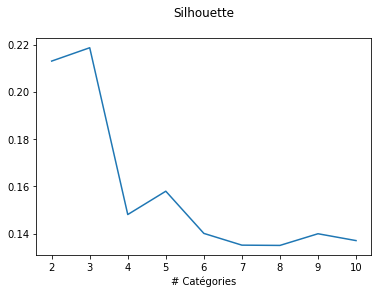

In [55]:
#plotting nb. of clusters vs. silhouette score
import matplotlib.pyplot as plt
plt.title("Silhouette\n")
plt.xlabel("# Catégories")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [56]:
#overall mean for each variable
m = data.mean()
#TSS (total sum of squares)
TSS = data.shape[0]*data.var(ddof=0)
print(TSS)

Galerie_Art         104.627303
Club_Danse          223.948113
Bar_Jus             608.840888
Restaurant           76.606375
Musees              187.326731
Station_Vacances    284.988170
Parc_Pique-nique      0.059936
Plage                18.510696
Theatre             130.162591
Religieux           101.116011
dtype: float64


In [57]:
#slicing the data.frame according to the groups
gb = data.groupby(kmeans.labels_)

#conditional groups size
nk = gb.size()
print(nk)

0    272
1     21
2    354
3    333
dtype: int64


In [58]:
#conditional means
mk = gb.mean()
print(mk)

   Galerie_Art  Club_Danse   Bar_Jus  Restaurant    Musees  Station_Vacances  \
0     0.854301    1.529706  1.961507    0.559890  1.257500          2.244596   
1     1.021905    1.920000  0.559048    2.086190  1.070476          1.946667   
2     0.885847    1.362373  0.598362    0.411045  0.704068          1.434689   
3     0.924655    1.161802  0.708559    0.541261  0.922462          1.942192   

   Parc_Pique-nique     Plage   Theatre  Religieux  
0          3.189301  2.786029  1.556728   2.522206  
1          3.181429  2.723810  1.509048   2.515238  
2          3.175000  2.805339  1.434181   3.089294  
3          3.180390  2.913724  1.727417   2.735045  


In [59]:
#square(difference between cond. means and overall mean)
EMk = (mk-m)**2

#weighted by the size of the groups
EM = EMk.multiply(nk,axis=0)

#sum => BSS (between sum of squares)
BSS = np.sum(EM,axis=0)
print(BSS)

Galerie_Art           1.108031
Club_Danse           27.448810
Bar_Jus             340.762067
Restaurant           56.144600
Musees               47.584213
Station_Vacances    106.388032
Parc_Pique-nique      0.031613
Plage                 3.287097
Theatre              14.907631
Religieux            53.723963
dtype: float64


In [60]:
#square of the correlation ratio
#i.e. proportion of variance explained
#for each variable
R2 = BSS/TSS
print(R2)

Galerie_Art         0.010590
Club_Danse          0.122568
Bar_Jus             0.559690
Restaurant          0.732897
Musees              0.254017
Station_Vacances    0.373307
Parc_Pique-nique    0.527437
Plage               0.177578
Theatre             0.114531
Religieux           0.531310
dtype: float64


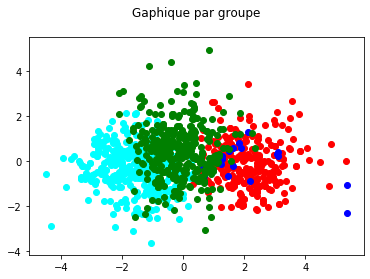

In [61]:
#PCA
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(data_cr)
plt.title("Gaphique par groupe\n")
#plotting the individuals into the factor map
#with various colors according to the cluster membership
for couleur,k in zip(['red','blue','aqua',"green"],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

In [62]:
#remove the instances corresponding to the group n°3 from the k-means
data_subset = data.iloc[kmeans.labels_!=2,:]
print(data_subset.shape)

(626, 10)


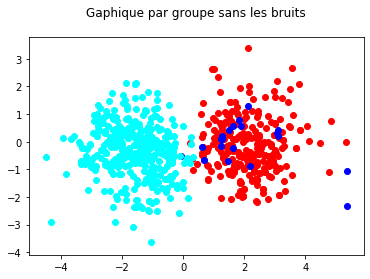

In [63]:
#PCA après suupression des bruits
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(data_cr)
plt.title("Gaphique par groupe sans les bruits\n")
#plotting the individuals into the factor map
#with various colors according to the cluster membership
for couleur,k in zip(['red','blue','aqua'],[0,1,2]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

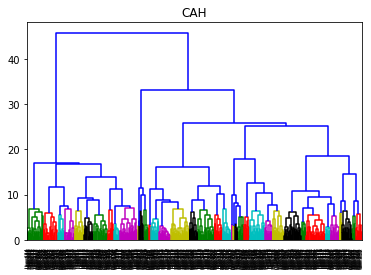

In [64]:
#standardize the new version of the dataset
data_subset_cr = preprocessing.scale(data_subset)

#generate the linkage matrix
Z_subset = linkage(data_subset_cr,method='ward',metric='euclidean')

#hac and plotting the dendrogram
plt.title("CAH")
dendrogram(Z_subset,labels=data_subset.index,orientation='top',color_threshold=7)
plt.show()


In [ ]:
#PCA
acp_subset = PCA(n_components=2).fit_transform(data_subset_cr)

#plotting the individuals into the factor map
#with various colors according to the cluster membership
plt.figure(figsize=(18,7.715))
for couleur,k in zip(['blue','lawngreen','aqua'],[1,2,3]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)

#set the row names into the scatter plot
for i,label in enumerate(data_subset.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))

plt.figure(figsize=(15,10))
plt.show() 